<a href="https://colab.research.google.com/github/ali1810/Solubility_Prediction/blob/main/LogS_ESOL_29_10_dataset_rf_xg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/KIT/delaney.csv') ## 1144
#df1= pd.read_csv('/content/drive/MyDrive/KIT/water_solubility_data.csv')##900
#df2= pd.read_csv('/content/drive/MyDrive/KIT/Solubility_data_supplement.csv')##9956
#df = pd.read_csv('/content/drive/MyDrive/KIT/figs_newmol/logP_dataset.csv', names=['smiles', 'logP']) #load the CSV file
print(df.columns) #()  # Display a few rows

Index(['Compound ID', 'measured log(solubility:mol/L)',
       'ESOL predicted log(solubility:mol/L)', 'SMILES'],
      dtype='object')


In [ ]:
df=df[["measured log(solubility:mol/L)","SMILES"]]
df.columns = ['LOGS','SMILES']

#df4=df1[["LogS","Smiles"]]
#df4.columns = ['LOGS','SMILES']

#df5=df2[["logS","SMILES"]]
#df5.columns = ['LOGS','SMILES']
#print(df5)
#print(len(df5))
frames=[df3,df4]
#df6=pd.concat(frames,axis=0)
print(df)

KeyError: ignored

In [ ]:
## To check the data is null or not 
#df2.isnull()

In [ ]:
### Dropping the null or NA values from the dataframe 
#df2 = df2.dropna()


In [ ]:
print(len(df))

1144


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


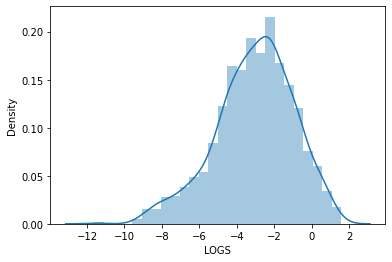

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.distplot(df["LOGS"])

#Chem.MolToInchi(Chem.MolFromSmiles('CC#[C]'))

In [ ]:
df6["smiles_length"]= df6["SMILES"].apply(len)

In [ ]:
max_lenghth=max(df6["smiles_length"])
max_lenghth

98

In [ ]:
print(len(df6))
df6  = df6[df6['smiles_length'] < 100]
print(len(df6))

2044
2044


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
### Installing RDKIT 

!mamba install -c conda-forge rdkit


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.8.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

pkgs/main/noarch         [] (--:--) No change
pkgs/main/noarch         [] (00m:00s) No ch

In [ ]:
#Importing Chem module
from rdkit import Chem 

#Method transforms smiles strings to mol rdkit object
df['mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x)) 

#df6.head()
print(len(df))

1144


In [ ]:
!pip install py3Dmol

In [ ]:
import py3Dmol  # pip install py3Dmol
from ipywidgets import interact,fixed,IntSlider
import ipywidgets

def show3D_molecule(idx, style):
    """
    Show molecule in 3D
    """
    mblock = Chem.MolToMolBlock(df['mol'].iloc[idx])
    viewer = py3Dmol.view(width=300, height=300)
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    viewer.rotate(45, "y", animationDuration=1)
   
    viewer.zoomTo()
    
    print(f"SMILES notation: {df['SMILES'].iloc[idx]}\nRotate me!");
    
    return viewer.show()
  
interact(show3D_molecule, 
         idx=ipywidgets.IntSlider(min=0,max=len(df["mol"])-1, 
                                  step=1, value=len(df), 
                                  description="Molecule"),
         style=ipywidgets.Dropdown(options=['line', 'stick', 'sphere'],
                                   value='stick',
                                   description='Style:'));


interactive(children=(IntSlider(value=1143, description='Molecule', max=1143), Dropdown(description='Style:', …

In [ ]:
style=['line', 'stick', 'sphere']
smiles = 'C[C@H]([C@@H](C)Cl)Cl'
mol = Chem.MolFromSmiles(smiles)

print(mol)
# Default
import py3Dmol  # pip install py3Dmol
from ipywidgets import interact,fixed,IntSlider
import ipywidgets
#def show3D_molecule(idx, style):"""
#Show molecule in 3D
mblock = Chem.MolToMolBlock(mol)
#print(mblock)
viewer = py3Dmol.view(width=300, height=300)
viewer.addModel(mblock, 'mol')
viewer.setStyle('line')
#viewer.setStyle({style:{line}})
viewer.rotate(45, "y", animationDuration=1)
viewer.zoomTo()
  
print(f"SMILES notation: {smiles}\nRotate me!");
    
viewer.show()
#viewer.Save('/content/drive/MyDrive/KIT/molecule_new.png')


SMILES notation: C[C@H]([C@@H](C)Cl)Cl
Rotate me!


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
def show3D_molecule(idx, style):
    """
    Show molecule in 3D
    """
    mblock = Chem.MolToMolBlock(df['mol'].iloc[idx])
    viewer = py3Dmol.view(width=300, height=300)
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    viewer.rotate(45, "y", animationDuration=1)
   
    viewer.zoomTo()
    
    print(f"SMILES notation: {df['smiles'].iloc[idx]}\nRotate me!");
    viewer.Save
    return viewer.show()


In [ ]:
# AddHs function adds H atoms to a MOL (as Hs in SMILES are usualy ignored)
df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))

In [ ]:
# GetNumAtoms() method returns a general nubmer of all atoms in a molecule
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())

# GetNumHeavyAtoms() method returns a nubmer of all atoms in a molecule with molecular weight > 1
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())

In [ ]:
#We're going to searches patterns and use it for a list of most common atoms only
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C', 'O', 'N', 'Cl', 'P', 'Br', 'F'], df)

In [ ]:
from rdkit.Chem import Descriptors
#df['tpsa'] = df['mol'].apply(lambda x: Descriptors.TPSA(x)) #https://en.wikipedia.org/wiki/Polar_surface_area
#df['mol_w'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x)) # https://en.wikipedia.org/wiki/Molecular_mass
df['num_valence_electrons'] = df['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x)) # https://en.wikipedia.org/wiki/Valence_electron
df['num_heteroatoms'] = df['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))

In [ ]:
df.head()

,LOGS,SMILES,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_P_atoms,num_of_Br_atoms,num_of_F_atoms,num_valence_electrons,num_heteroatoms
0,-2.18,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7faa058c5170>,8,6,2,0,0,4,0,0,0,38,4
1,-2.00,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7faa058cd990>,8,5,2,0,0,3,0,0,0,32,3
2,-1.74,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7faa058cd580>,8,6,2,0,0,4,0,0,0,38,4
3,-1.48,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7faa058cd4e0>,8,5,2,0,0,3,0,0,0,32,3
4,-3.04,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x7faa058cd3f0>,8,8,2,0,0,3,0,0,3,50,6


In [ ]:
import numpy as np
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen
def getAromaticProportion(m):
    aromatic_list = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aromatic = 0
    for i in aromatic_list:
        if i:
            aromatic += 1
    heavy_atom = Lipinski.HeavyAtomCount(m)
    return aromatic / heavy_atom


def generate(smiles):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData = np.arange(1, 1)
    i = 0
    for mol in moldata:

        desc_MolLogP = Crippen.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
        desc_AromaticProportion = getAromaticProportion(mol)
        desc_Ringcount        =   Descriptors.RingCount(mol)
        desc_TPSA = Descriptors.TPSA(mol)
        desc_Hdonrs=Lipinski.NumHDonors(mol)
        desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
        desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
        desc_HAcceptors = Lipinski.NumHAcceptors(mol)
        desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
        #desc_molMR=Descriptors.MolMR(mol)
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds,
                        desc_AromaticProportion,desc_Ringcount,desc_TPSA,desc_Hdonrs,desc_SaturatedRings,desc_AliphaticRings,desc_HAcceptors,desc_Heteroatoms])

        if i == 0:
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i = i + 1

    columnNames = ["MolLogP", "MolWt", "NumRotatableBonds", "AromaticProportion","Ring_Count","TPSA","H_donors","Saturated_Rings","AliphaticRings","H_Acceptors","Heteroatoms"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors


In [ ]:
df1 = generate(df.SMILES)
#type(df8)
print(len(df1))

1144


In [ ]:
Y=df["LOGS"]
df2=df.iloc[0:,9:26]
#type(df8)
#print(df7.shape)
frames = [df1, df2]
#X = df7
X = pd.concat(frames,axis=1)
print(X)

      MolLogP    MolWt  ...  num_valence_electrons  num_heteroatoms
0     2.59540  167.850  ...                     38                4
1     2.37650  133.405  ...                     32                3
2     2.59380  167.850  ...                     38                4
3     2.02890  133.405  ...                     32                3
4     2.91890  187.375  ...                     50                6
...       ...      ...  ...                    ...              ...
1139  1.98820  287.343  ...                     96                8
1140  3.42130  286.114  ...                     94                6
1141  3.60960  308.333  ...                    116                4
1142  2.56214  354.815  ...                    122                8
1143  2.02164  179.219  ...                     70                3

[1144 rows x 16 columns]


In [ ]:
#X= scaler.fit_transform(X)
import numpy as np 
from sklearn.preprocessing import StandardScaler
#Y= scaler.fit_transform(Y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)
scaler = StandardScaler()

#print(X_train)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)





(1086, 16)
(58, 16)
(58,)
(1086,)


In [ ]:
order = [ 0,  1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15]
num_features = 3
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

In [ ]:
for num_features in range(1,17):
    model_rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
    model_rf.fit(X_train[:,order[:num_features]], y_train)
    r2_train = r2_score(y_train, model_rf.predict(X_train[:,order[:num_features]]))
    r2_test = r2_score(y_test, model_rf.predict(X_test[:,order[:num_features]]))
    print("   ###   %i features"%(num_features))
    print("   ---   Train r2: %f"%(r2_train))
    print("   ---   Test r2:  %f"%(r2_test))
    importances = model_rf.feature_importances_
    feature_order = np.argsort(importances)
    print(feature_order[::-1])

   ###   1 features
   ---   Train r2: 0.958422
   ---   Test r2:  0.789124
[0]
   ###   2 features
   ---   Train r2: 0.977577
   ---   Test r2:  0.895994
[0 1]
   ###   3 features
   ---   Train r2: 0.979552
   ---   Test r2:  0.903442
[0 1 2]
   ###   4 features
   ---   Train r2: 0.980283
   ---   Test r2:  0.915722
[0 1 3 2]
   ###   5 features
   ---   Train r2: 0.980477
   ---   Test r2:  0.916727
[0 1 3 2 4]
   ###   6 features
   ---   Train r2: 0.981596
   ---   Test r2:  0.918843
[0 1 5 3 4 2]
   ###   7 features
   ---   Train r2: 0.981683
   ---   Test r2:  0.919741
[0 1 5 3 4 2 6]
   ###   8 features
   ---   Train r2: 0.981622
   ---   Test r2:  0.918186
[0 1 5 3 4 2 6 7]
   ###   9 features
   ---   Train r2: 0.981601
   ---   Test r2:  0.919673
[0 1 5 3 4 2 6 8 7]
   ###   10 features
   ---   Train r2: 0.981777
   ---   Test r2:  0.922773
[0 1 5 3 4 2 9 6 8 7]
   ###   11 features
   ---   Train r2: 0.982222
   ---   Test r2:  0.927214
[ 0  1  5 10  4  3  2  9  6  8  

In [ ]:
from xgboost import XGBRegressor
#model_xgr = XGBRegressor(n_estimators = 10000, random_state = 0)
for num_features in range(1,19):
    model_xgr = XGBRegressor(n_estimators = 10000, random_state = 0)
    model_xgr.fit(X_train[:,order[:num_features]], y_train)
    r2_train = r2_score(y_train, model_xgr.predict(X_train[:,order[:num_features]]))
    r2_test = r2_score(y_test, model_xgr.predict(X_test[:,order[:num_features]]))
    print("   ###   %i features"%(num_features))
    print("   ---   Train r2: %f"%(r2_train))
    print("   ---   Test r2:  %f"%(r2_test))
    importances = model_rf.feature_importances_
    feature_order = np.argsort(importances)
    print(feature_order[::-1])


[17:57:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   ###   1 features
   ---   Train r2: 0.018266
   ---   Test r2:  0.006054
[10  9  8  2  3  7  0  5  1  6  4]
[17:57:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   ###   2 features
   ---   Train r2: 0.192272
   ---   Test r2:  0.162666
[10  9  8  2  3  7  0  5  1  6  4]
[17:57:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   ###   3 features
   ---   Train r2: 0.726145
   ---   Test r2:  0.335025
[10  9  8  2  3  7  0  5  1  6  4]
[17:57:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
   ###   4 features
   ---   Train r2: 0.825459
   ---   Test r2:  0.470237
[10  9  8  2  3  7  0  5  1  6  4]
[17:57:37] WARNING: /workspace/src/objective/reg

In [ ]:
# Initialising the ANN
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 18))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
#model.add(Dense(units = 32, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 16, activation = 'relu'))
# Adding the fifth hidden layer
#model.add(Dense(units = 16, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
109/109 [==============================] - 1s 2ms/step - loss: 8.0132
Epoch 2/100
109/109 [==============================] - 0s 2ms/step - loss: 1.5075
Epoch 3/100
109/109 [==============================] - 0s 2ms/step - loss: 1.3489
Epoch 4/100
109/109 [==============================] - 0s 2ms/step - loss: 1.2408
Epoch 5/100
109/109 [==============================] - 0s 2ms/step - loss: 1.1324
Epoch 6/100
109/109 [==============================] - 0s 2ms/step - loss: 1.0556
Epoch 7/100
109/109 [==============================] - 0s 2ms/step - loss: 0.9845
Epoch 8/100
109/109 [==============================] - 0s 2ms/step - loss: 1.0213
Epoch 9/100
109/109 [==============================] - 0s 2ms/step - loss: 0.9733
Epoch 10/100
109/109 [==============================] - 0s 2ms/step - loss: 0.9813
Epoch 11/100
109/109 [==============================] - 0s 2ms/step - loss: 1.0041
Epoch 12/100
109/109 [==============================] - 0s 2ms/step - loss: 0.9303
Epoch 13/100


In [ ]:
Y_pred_ann = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, Y_pred_ann)

0.8560454357666466

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
from xgboost import XGBRegressor
#model_xgr = XGBRegressor(n_estimators = 10000, random_state = 0)
for num_features in range(1,19):
    model.fit(X_train[:,order[:num_features]], y_train)
    r2_train = r2_score(y_train, model.predict(X_train[:,order[:num_features]]))
    r2_test = r2_score(y_test, model.predict(X_test[:,order[:num_features]]))
    print("   ###   %i features"%(num_features))
    print("   ---   Train r2: %f"%(r2_train))
    print("   ---   Test r2:  %f"%(r2_test))
    importances = model_rf.feature_importances_
    feature_order = np.argsort(importances)
    print(feature_order[::-1])

Epoch 1/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5614
Epoch 2/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5952
Epoch 3/100
109/109 [==============================] - 0s 2ms/step - loss: 0.6157
Epoch 4/100
109/109 [==============================] - 0s 2ms/step - loss: 0.6300
Epoch 5/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5431
Epoch 6/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5863
Epoch 7/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5612
Epoch 8/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5570
Epoch 9/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5833
Epoch 10/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5657
Epoch 11/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5422
Epoch 12/100
109/109 [==============================] - 0s 2ms/step - loss: 0.5296
Epoch 13/100


ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


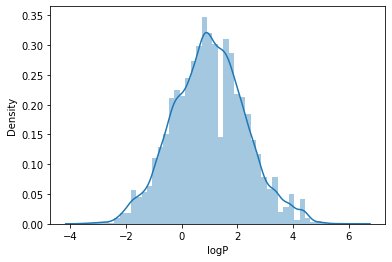

In [ ]:
## Ditribution of LogS....
import seaborn as sns

## Based on the graph we can say the LogS range between -4 to 1
sns.distplot(df["logP"])


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_svr=SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
model_rf = RandomForestRegressor(n_estimators = 10000, random_state = 0)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def plot_evaluation(model, X_test, y_test, title="Test"):
    """
    Scatter plot between target and prediction logP values
    """
    
    prediction = np.squeeze(model.predict(X_test))
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)

    plt.figure(figsize=(10,10))
    sns.regplot(x=prediction, y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
    plt.xlabel('Model Prediction', fontsize=24);
    plt.ylabel('Measured logP', fontsize=24);
    plt.xticks(fontsize=24);
    plt.yticks(fontsize=24);
    plt.suptitle('Predicting logP from SMILES', fontsize=32);
    plt.title(f'{title}: MAE = {mae:.3f}, MSE = {mse:.3f}', fontsize=24);
    plt.grid(True);
         
    cc = np.corrcoef(y_test, prediction)
    plt.text(-1.5, 2, f"Correlation\ncoefficient\n{cc[0][1]:.4f}", fontsize=20, 
             horizontalalignment="center", backgroundcolor="black", color="white")
#     print('MAE score:', round(mae, 4))
#     print('MSE score:', round(mse,4))

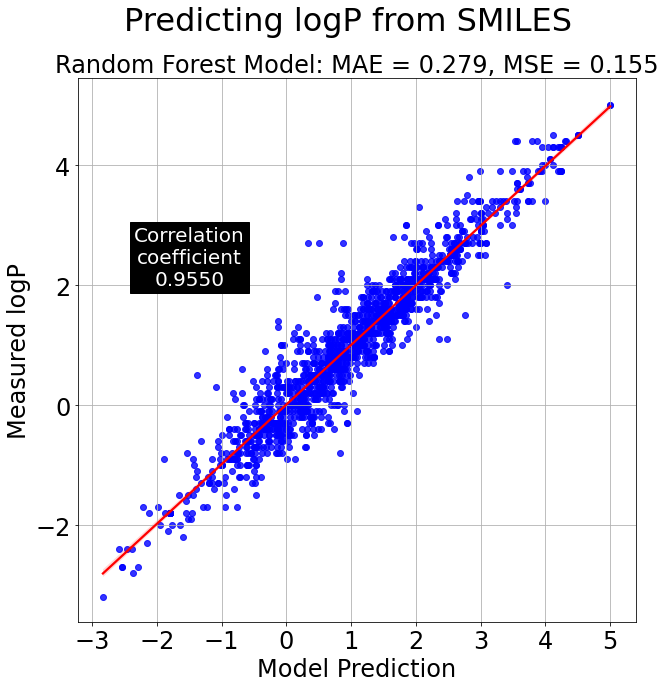

In [ ]:
import numpy as np                #!pip install numpy
import pandas as pd               #!pip install pandas
import matplotlib.pyplot as plt   #!pip install matplotlib
import seaborn as sns             #!pip install seaborn
plot_evaluation(model_rf, X_test, y_test, "Random Forest Model")


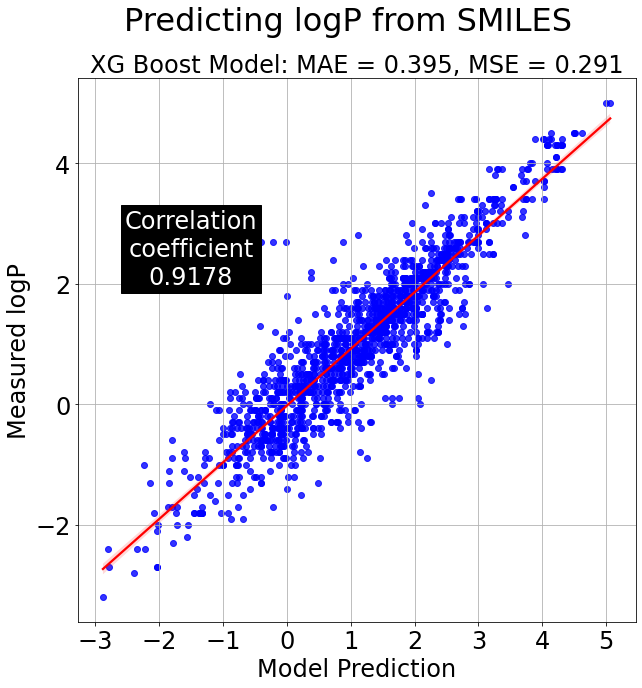

In [ ]:
plot_evaluation(model_xgr, X_test, y_test, "XG Boost Model")

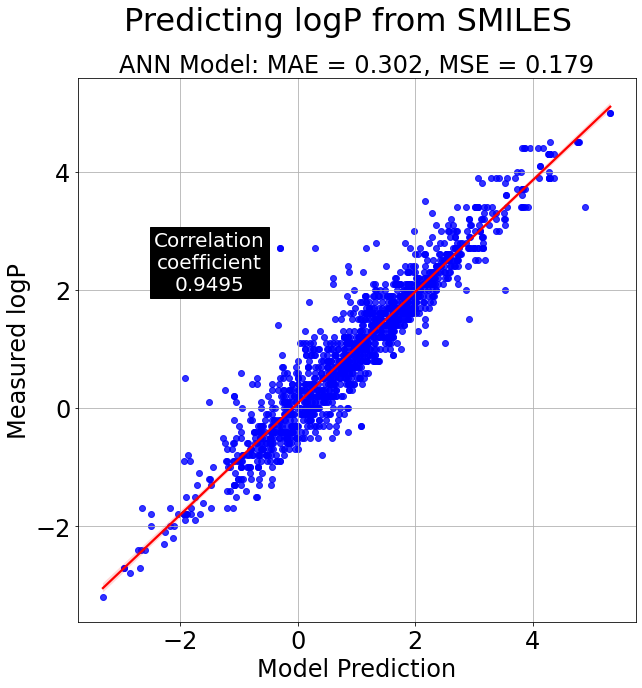

In [ ]:
plot_evaluation(model, X_test, y_test, "ANN Model")

In [ ]:
import matplotlib.pyplot as plt
preds = model_rf.predict(X_train)
x_y_line = np.linspace(min(y_train.flatten()), max(y_train.flatten()), 500)
plt.plot(y_train.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

AttributeError: ignored

In [ ]:
from xgboost import XGBRegressor
model_xgr = XGBRegressor(n_estimators = 10000, random_state = 0)
model_xgr.fit(X_train, y_train)

[10:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred_test_xgr = model_xgr.predict(X_test)

In [ ]:
Y_pred_test_rf = model_rf.predict(X_test)
res = "\n".join("{} {}".format(x, y) for x, y in zip(y_test,Y_pred_test_rf ))
print(res)

0.5 0.6196775082695157
1.0 0.6804187764421183
-0.3 -0.22705435793664533
-0.9 -0.5228216687071169
1.4 1.170499620981481
0.4 0.8771017614689032
1.7 1.2659118059430434
0.2 -0.2935198320584175
2.2 2.1830349523812673
1.0 0.6410859371462148
2.5 2.525043696994636
0.0 0.17451040310916288
-1.1 -0.4932007622654982
-0.4 -0.20639227380952008
2.7 3.0818470729051
0.8 1.352357645049341
0.4 0.34531158269508094
-0.1 0.46124439750490576
1.4 1.5326475778130677
3.1 2.8466643531742286
1.5 1.116450114861149
1.1 0.6804187764421183
0.1 0.2149651384644755
1.9 1.861857229575915
-0.3 -0.13595926066702654
-0.5 -0.45679683955664996
0.2 0.012001542318715197
-0.1 -0.42251947263851236
1.3 0.1713805696803077
2.4 2.595705535270198
0.2 -0.2881353478800893
-1.7 -1.9895261500377384
0.1 0.4747760234297666
0.9 -0.32763329588741347
-1.3 -1.3130544523807721
2.2 2.104299606421263
2.7 2.6808129635747324
-1.7 -1.228054096930972
0.8 0.9432538980330364
-2.0 -1.7691102031024242
0.4 0.1794745312495494
-0.4 -0.3722045215618315
1.2 1.

In [ ]:
# Initialising the ANN
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 12))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
#model.add(Dense(units = 32, activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(units = 16, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1315/1315 [==============================] - 3s 2ms/step - loss: 0.2808
Epoch 2/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1861
Epoch 3/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1793
Epoch 4/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1748
Epoch 5/100
1315/1315 [==============================] - 3s 2ms/step - loss: 0.1729
Epoch 6/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1707
Epoch 7/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1692
Epoch 8/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1671
Epoch 9/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1665
Epoch 10/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1666
Epoch 11/100
1315/1315 [==============================] - 2s 2ms/step - loss: 0.1641
Epoch 12/100
1315/1315 [==============================] - 2s 2ms/step - lo

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
def plot_example(model, X_test, y_test, df, idx=0, show_3d = True):
    """
    Plot the chemical, the measured logP, and the predicted logP
    """

    prediction = np.squeeze(model.predict(np.expand_dims(X_test.iloc[idx], 0))[0])
    #prediction = model.predict(((X_test.iloc[idx], 0))[0])
    #mblock = Chem.MolToMolBlock(df['mol'].iloc[idx])
    
    target = df[df.index==X_test.index[idx]]["logP"].values[0]
    
    if show_3d:
        show3D_molecule(idx, "stick")
    else:
        display(df[df.index==X_test.index[idx]]["mol"].values[0])
    
    smiles = df[df.index==X_test.index[idx]]["smiles"].values[0]
    
    print(f"SMILES notation: {smiles}")
    print(f"Target logP = {target:.3f}, Prediction logP = {prediction:.3f}")
    print("="*50)

In [ ]:
import numpy as np
indicies = np.random.choice(range(len(X_test)), 10) # Try a few examples

for idx in indicies:
    plot_example(model_rf, X_test, y_test, df, idx, show_3d=True)

AttributeError: ignored

In [ ]:
from sklearn.metrics import r2_score
#r2_score(y_test, Y_pred_test_rf)
r2_score(y_test,y_pred)

0.8980047568930476

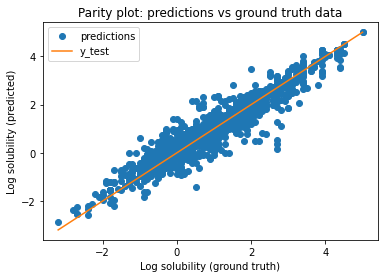

In [ ]:
import matplotlib.pyplot as plt
preds = model_rf.predict(X_test)
x_y_line = np.linspace(min(y_test.flatten()), max(y_test.flatten()), 500)
plt.plot(y_test.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y_test')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

In [ ]:
import pickle
#### Save the model :::::
#filename = 'finalized_model.rf'
pickle.dump(model_rf, open('/content/drive/MyDrive/KIT/Finalized_model_Logp_91%.pkl', 'wb'))
 



In [ ]:
# some time later...
import pickle 
# load the model from disk
loaded_model = pickle.load(open('/content/drive/MyDrive/KIT/finalized_model_ethanol_99%.pkl', 'rb'))
Y_pred_test_rf = loaded_model.predict(X_test)
result = r2_score(y_test, Y_pred_test_rf)
print(result)

NameError: ignored

In [ ]:
elem=input("Enter smiles get solubility ")
#elem='CCc1ccccc1C'
#moldata = []
#for elem in smiles:
mol = Chem.MolFromSmiles(elem)
#moldata.append(mol)

#    baseData = np.arange(1, 1)
#    i = 0
#    for mol in moldata:

desc_MolLogP = Crippen.MolLogP(mol)
desc_MolWt = Descriptors.MolWt(mol)
desc_NumRotatableBonds = Lipinski.NumRotatableBonds(mol)
desc_AromaticProportion = getAromaticProportion(mol)
desc_Ringcount        =   Descriptors.RingCount(mol)
desc_TPSA = Descriptors.TPSA(mol)
desc_Hdonrs=Lipinski.NumHDonors(mol)
desc_SaturatedRings = Lipinski.NumSaturatedRings(mol)   
desc_AliphaticRings = Lipinski.NumAliphaticRings(mol) 
desc_HAcceptors = Lipinski.NumHAcceptors(mol)
desc_Heteroatoms = Lipinski.NumHeteroatoms(mol)
#desc_molMR=Descriptors.MolMR(mol)
row = np.array([desc_MolLogP,desc_MolWt,desc_NumRotatableBonds,desc_AromaticProportion,desc_Ringcount,desc_TPSA,desc_Hdonrs,desc_SaturatedRings,desc_AliphaticRings,desc_HAcceptors,desc_Heteroatoms])
                     #   
                     #   
                     #   )

        #if i == 0:
baseData = row
        #else:
baseData = np.vstack([row])
#i = i + 1

columnNames = ["MolLogP", "MolWt", "NumRotatableBonds", "AromaticProportion","Ring_Count","TPSA","H_donors","Saturated_Rings","AliphaticRings","H_Acceptors","Heteroatoms"]
descriptors = pd.DataFrame(data=baseData, columns=columnNames)
descriptors =np.array(descriptors) 
preds=loaded_model.predict(descriptors)
#predict_test_input = smiles_to_onehots(['elem'], charset, max_smiles_chars)
#loaded_model1 = load_model("/content/drive/MyDrive/solubility_model_8858.hdf5")
#solubility_prediction = loaded_model.predict(predict_test_input)
print(preds)
#print(solubility_prediction)
#print(type(descriptors))    


Enter smiles get solubility Cc1cccc(C=C)c1
[-3.32955893]
